# 06_04: A yearly top ten

In [1]:
import math
import collections
import dataclasses
import datetime

import numpy as np
import pandas as pd
import matplotlib.pyplot as pp

In [2]:
allyears = pd.read_feather('allyears.feather')

In [3]:
allyears_byyear = allyears.set_index(['sex', 'year']).sort_index()

In [4]:
allyears_byyear

name  number
sex year                   
F   1880       Mary    7065
    1880       Anna    2604
    1880       Emma    2003
    1880  Elizabeth    1939
    1880     Minnie    1746
...             ...     ...
M   2023      Zyell       5
    2023       Zyen       5
    2023     Zymirr       5
    2023     Zyquan       5
    2023      Zyrin       5

[2117219 rows x 2 columns]

In [5]:
allyears_byyear.loc['M', 2000].sort_values('number', ascending=False)

name  number
sex year                     
M   2000        Jacob   34490
    2000      Michael   32042
    2000      Matthew   28579
    2000       Joshua   27540
    2000  Christopher   24936
...               ...     ...
    2000         Zeph       5
    2000        Zeven       5
    2000        Ziggy       5
    2000           Zo       5
    2000        Zyier       5

[12118 rows x 2 columns]

In [6]:
allyears_byyear.loc['M', 2023].sort_values('number', ascending=False).head(10)

name  number
sex year                  
M   2023      Liam   20802
    2023      Noah   18995
    2023    Oliver   14741
    2023     James   11670
    2023    Elijah   11452
    2023     Mateo   11229
    2023  Theodore   11041
    2023     Henry   10941
    2023     Lucas   10842
    2023   William   10598

In [7]:
allyears_byyear.loc['F', 2023].sort_values('number', ascending=False).head(10)

name  number
sex year                   
F   2023     Olivia   15270
    2023       Emma   13527
    2023  Charlotte   12596
    2023     Amelia   12311
    2023     Sophia   11944
    2023        Mia   11359
    2023   Isabella   10808
    2023        Ava    9682
    2023     Evelyn    9082
    2023       Luna    7811

In [8]:
allyears_byyear.loc['F', 2023].sort_values('number', ascending=False).head(10).reset_index().name

0       Olivia
1         Emma
2    Charlotte
3       Amelia
4       Sophia
5          Mia
6     Isabella
7          Ava
8       Evelyn
9         Luna
Name: name, dtype: string

In [9]:
def getyear(sex, year):
    return (allyears_byyear.loc[sex, year].sort_values('number', ascending=False).head(10).reset_index().name)

In [10]:
pd.DataFrame({year: getyear('M', year) for year in range(2014, 2024)})

,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Noah,Noah,Noah,Liam,Liam,Liam,Liam,Liam,Liam,Liam
1,Liam,Liam,Liam,Noah,Noah,Noah,Noah,Noah,Noah,Noah
2,Mason,Mason,William,William,William,Oliver,Oliver,Oliver,Oliver,Oliver
3,Jacob,Jacob,Mason,James,James,William,Elijah,Elijah,James,James
4,William,William,James,Logan,Oliver,Elijah,William,James,Elijah,Elijah
5,Ethan,Ethan,Benjamin,Benjamin,Benjamin,James,James,William,William,Mateo
6,Michael,James,Jacob,Mason,Elijah,Benjamin,Benjamin,Benjamin,Henry,Theodore
7,Alexander,Alexander,Michael,Elijah,Lucas,Lucas,Lucas,Lucas,Lucas,Henry
8,James,Michael,Elijah,Jacob,Mason,Mason,Henry,Henry,Benjamin,Lucas
9,Daniel,Benjamin,Ethan,Oliver,Logan,Alexander,Alexander,Theodore,Theodore,William


In [11]:
pd.DataFrame({year: getyear('F', year) for year in range(2014, 2024)})

,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Emma,Emma,Emma,Emma,Emma,Olivia,Olivia,Olivia,Olivia,Olivia
1,Olivia,Olivia,Olivia,Olivia,Olivia,Emma,Emma,Emma,Emma,Emma
2,Sophia,Sophia,Ava,Ava,Ava,Ava,Ava,Charlotte,Charlotte,Charlotte
3,Isabella,Ava,Sophia,Isabella,Isabella,Sophia,Charlotte,Amelia,Amelia,Amelia
4,Ava,Isabella,Isabella,Sophia,Sophia,Isabella,Sophia,Ava,Sophia,Sophia
5,Mia,Mia,Mia,Mia,Charlotte,Charlotte,Amelia,Sophia,Isabella,Mia
6,Emily,Abigail,Charlotte,Charlotte,Mia,Amelia,Isabella,Isabella,Ava,Isabella
7,Abigail,Emily,Abigail,Amelia,Amelia,Mia,Mia,Mia,Mia,Ava
8,Madison,Charlotte,Emily,Evelyn,Harper,Harper,Evelyn,Evelyn,Evelyn,Evelyn
9,Charlotte,Harper,Amelia,Abigail,Evelyn,Evelyn,Harper,Harper,Luna,Luna


In [12]:
allyears_byname = allyears.set_index(['sex', 'name', 'year']).sort_index()

In [13]:
allyears_byname

number
sex name   year        
F   Aabha  2011       7
           2012       5
           2014       9
           2015       7
           2016       7
...                 ...
M   Zyvion 2009       5
    Zyvon  2015       7
    Zyyon  2014       6
    Zzyzx  2010       5
           2018       5

[2117219 rows x 1 columns]

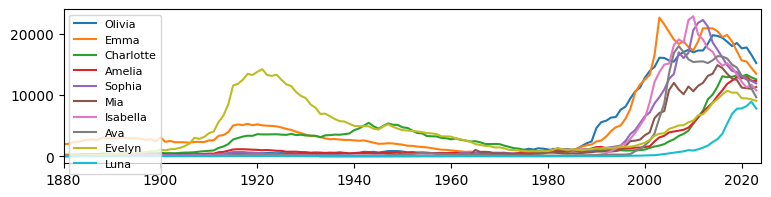

In [14]:
pp.figure(figsize=(9,2))

for name in getyear('F', 2023):
    pp.plot(allyears_byname.loc['F', name], label=name)

pp.axis(xmin=1880, xmax=2024)
pp.legend(loc='upper left', fontsize=8);

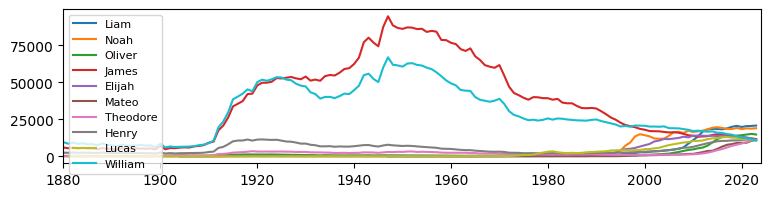

In [15]:
pp.figure(figsize=(9,2))

for name in getyear('M', 2023):
    pp.plot(allyears_byname.loc['M', name], label=name)

pp.axis(xmin=1880, xmax=2024)
pp.legend(loc='upper left', fontsize=8);

In [16]:
alltime_f = allyears_byyear.loc['F'] \
                            .groupby('name') \
                            .sum() \
                            .sort_values('number', ascending=False) \
                            .head(10)

In [17]:
alltime_f

,number
name,
Mary,4136872
Elizabeth,1674865
Patricia,1573241
Jennifer,1470608
Linda,1454476
Barbara,1436052
Margaret,1259974
Susan,1122984
Dorothy,1110746


In [21]:
allyears_byname.loc[pd.IndexSlice['F', getyear('F', 2023), :]].groupby('name').sum()

,number
name,
Amelia,255502
Ava,327483
Charlotte,427311
Emma,749903
Evelyn,621387
Isabella,395255
Luna,74374
Mia,286817
Olivia,538805


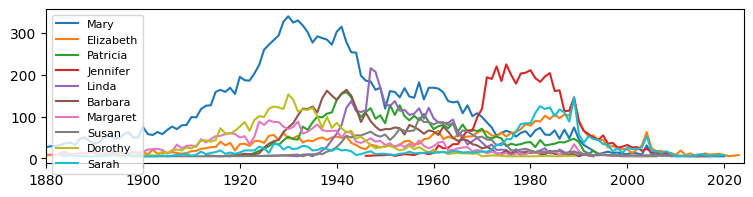

In [22]:
pp.figure(figsize=(9,2))

for name in alltime_f.index:
    pp.plot(allyears_byname.loc['M', name], label=name)

pp.axis(xmin=1880, xmax=2024)
pp.legend(loc='upper left', fontsize=8);